In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/scratch/user/xiliangdiao/LR2/Sunway_LR_1850020100Z_2101010100Z.nc')

In [3]:
plotvar = data.variables['PSL']

In [4]:
plotvar.shape

(3012, 192, 288)

In [5]:
##65 #40W-30E
P651 = plotvar[:,26,:24]
P652 = plotvar[:,26,-32:]
re652 = np.hstack((P651,P652))
A = np.nanmean(re652,axis=1)

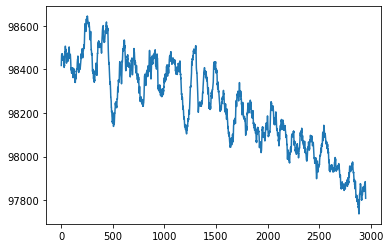

In [6]:
Atry = np.convolve(A, np.ones((60,))/60, mode='valid')
plt.plot(Atry)

In [7]:
##40
P401 = plotvar[:,53,:24]
P402 = plotvar[:,53,-32:]
re402 = np.hstack((P401,P402))
B = np.nanmean(re402,axis=1)

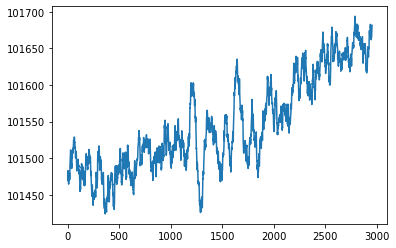

In [8]:
Btry = np.convolve(B, np.ones((60,))/60, mode='valid')
plt.plot(Btry)

In [9]:
std1 = np.std(A)
ave1 = np.nanmean(A)
final65 = (A - ave1)/std1

std = np.std(B)
ave = np.nanmean(B)
final40 = (B - ave)/std

In [10]:
ddd20062100 = final65-final40

In [11]:
ww2 = np.convolve(ddd20062100, np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww2)

In [12]:
ddd20062100.shape

(3012,)

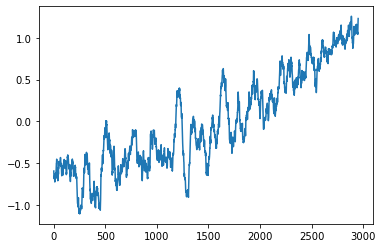

In [13]:
plt.plot(-ww2)

In [14]:
ww2 = np.convolve(ddd20062100[0:3000], np.ones((60,))/60, mode='valid')

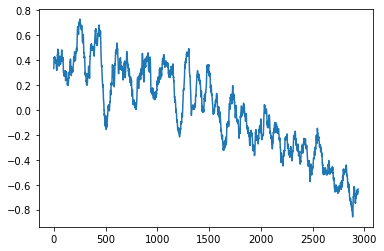

In [15]:
ww65 = np.convolve(final65[0:3000], np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww65)
plt.plot(ww65)

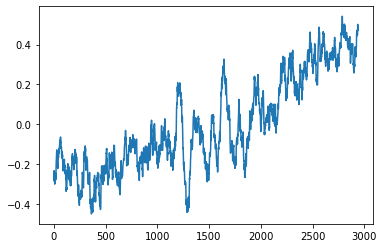

In [16]:
ww40 = np.convolve(final40[0:3000], np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww40)
plt.plot(ww40)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


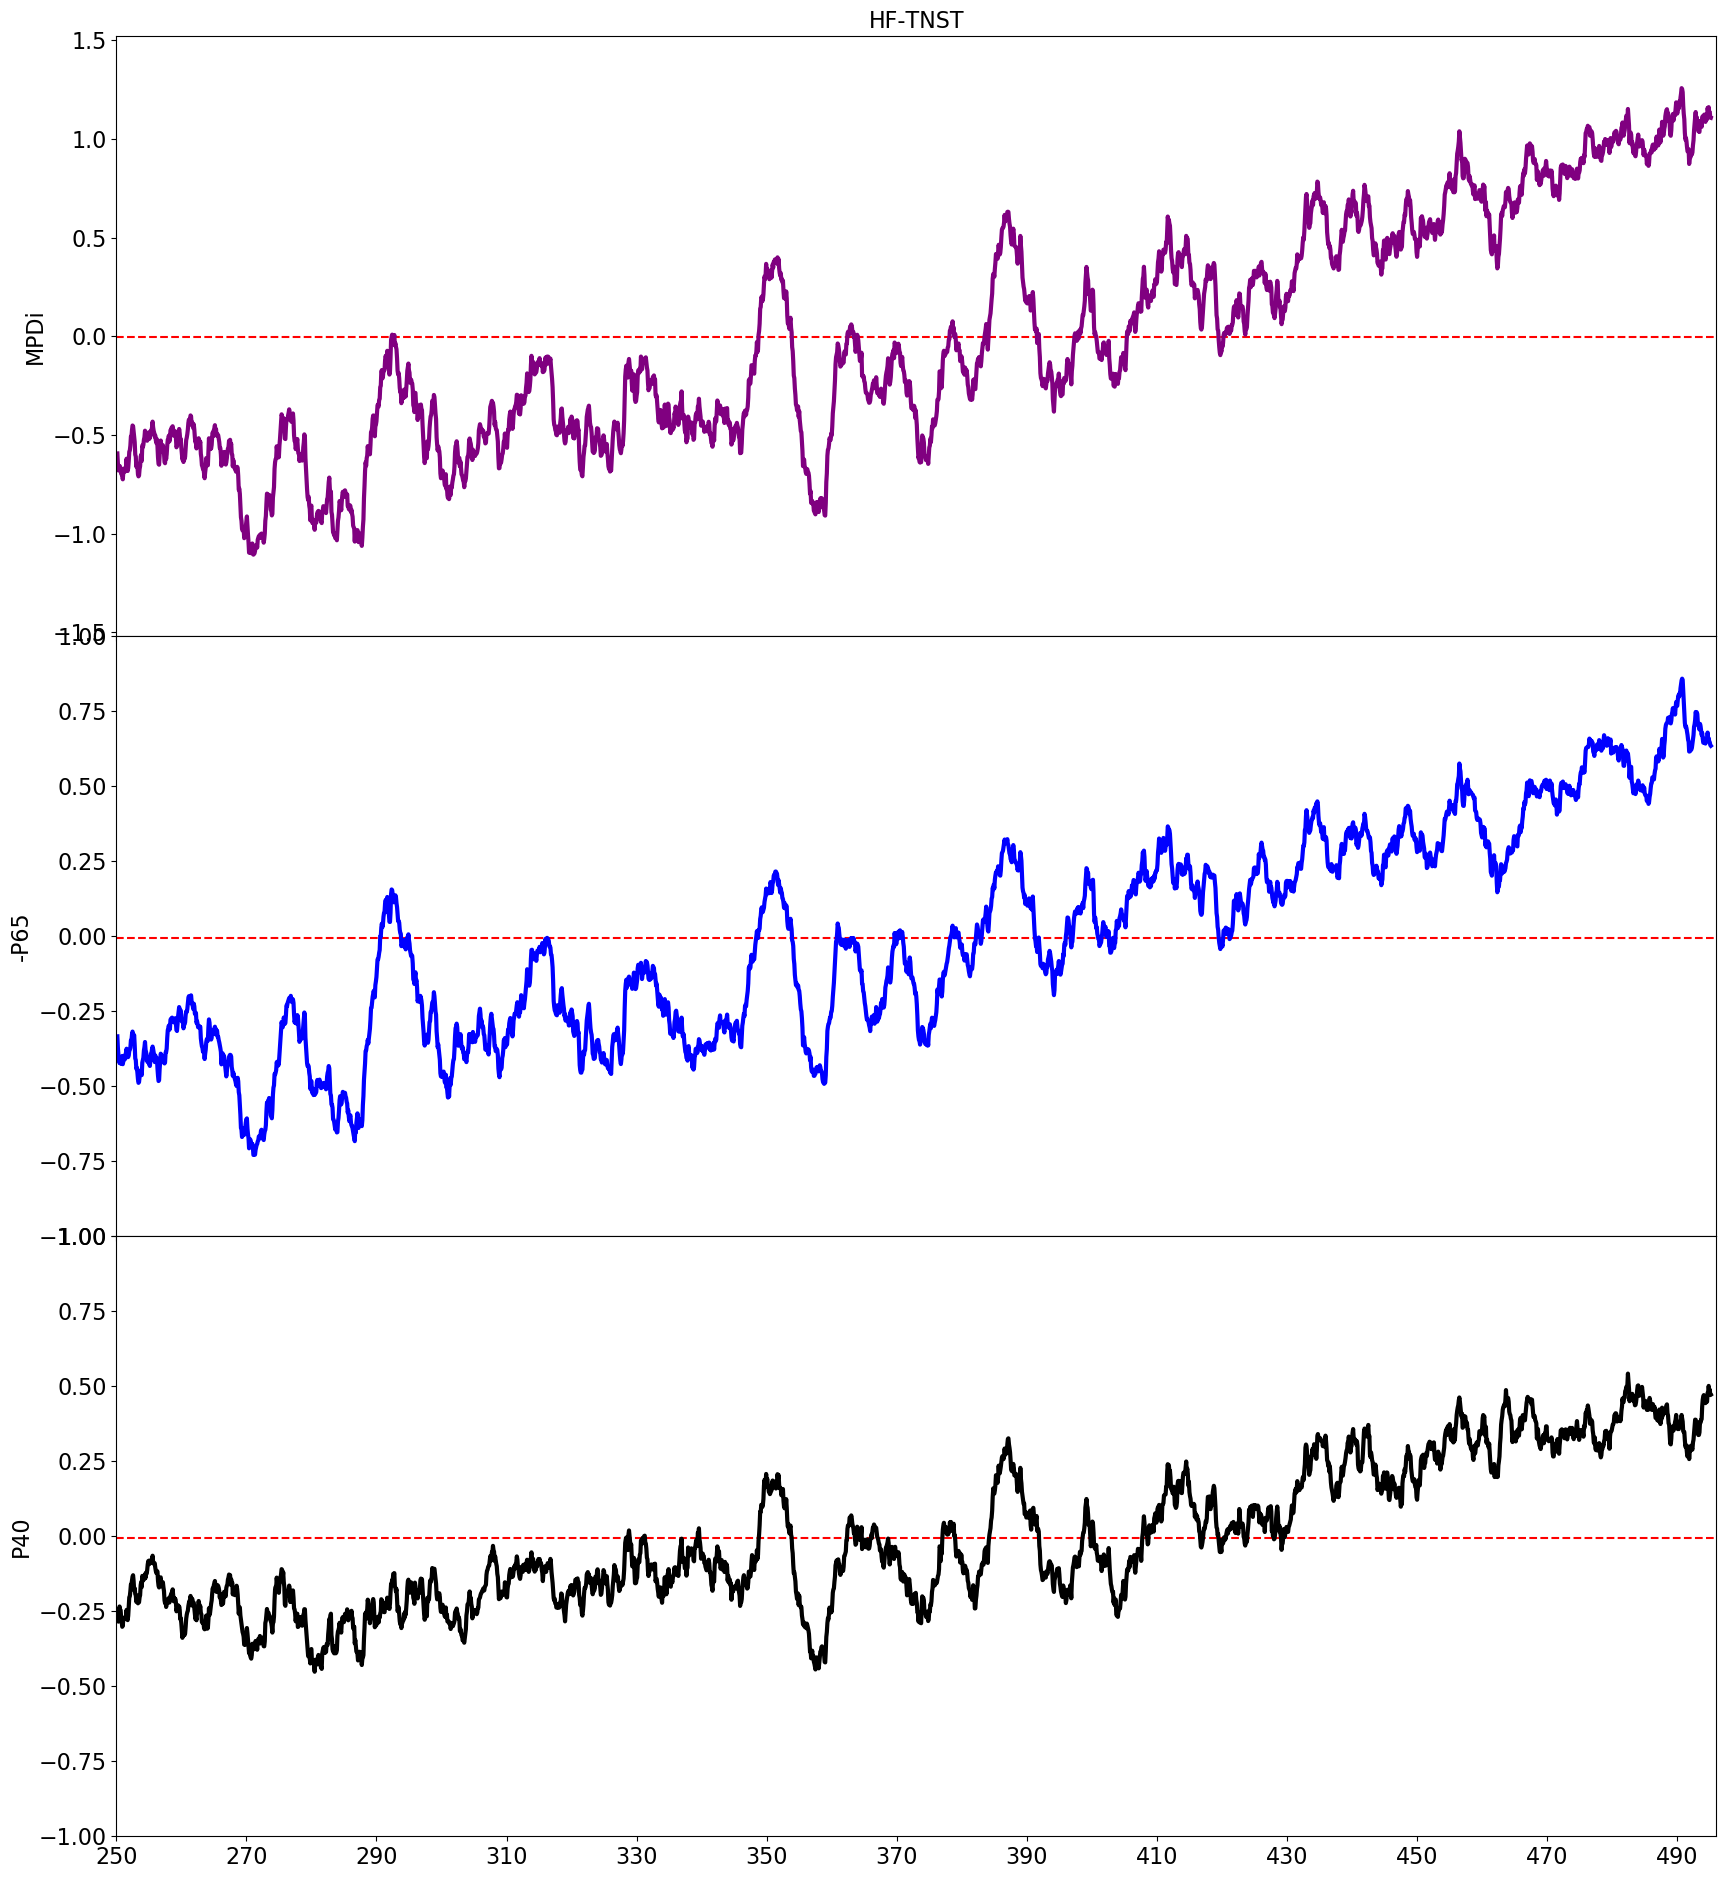

In [17]:
t = np.arange(2,2943,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,15), dpi=100)
################################################################
################################################################

ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.4],
                   xticklabels=[])
#ax0 = plt.subplot(2,1,1)
ax1.plot(t,-ww2,'purple',linewidth=3)
plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################
#plt.xticks(range(0,2952,240), ['1850','1870','1890','1910','1930', '1950', '1970','1990','2010','2030','2050', '2070', '2090','410','430','450','470','490','500'],**my_font)

plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
#plt.xlabel('Years',**my_font)
plt.ylabel('MPDi',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax1.set(ylim=(-1.52, 1.52),xlim=(0, 2952))
plt.title('HF-TNST',**my_font)
#ax1.set_title('HF-TNST simulation (averaged over the Weddell Sea Region 45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)
###########################################
ax2 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[])
ax2.plot(t,-ww65,'blue',linewidth=3)
plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################
#plt.xticks(range(0,2952,240), ['250','270','290','310','330', '350', '370','390','410','430','450', '470', '490','510','430','450','470','490','500'],**my_font)

plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
#plt.xlabel('Years',**my_font)
plt.ylabel('-P65',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax2.set(ylim=(-1, 1),xlim=(0, 2952))
#ax2.set_title('PI-CTRL simulation (averaged over the Weddell Sea Region 45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)

#####################################################################

ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   xticklabels=[])
ax3.plot(t,ww40,'black',linewidth=3)
plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################
plt.xticks(range(0,2952,240), ['250','270','290','310','330', '350', '370','390','410','430','450', '470', '490','510','430','450','470','490','500'],**my_font)

plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
#plt.xlabel('Years',**my_font)
plt.ylabel('P40',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax3.set(ylim=(-1, 1),xlim=(0, 2952))

plt.savefig("MPDiLR2.png",bbox_inches='tight',dpi=fig.dpi)

In [18]:
np.savetxt('ww65plotLR.out',ww65)
np.savetxt('ww40plotLR.out',ww40)
np.savetxt('ww2plotLR.out',ww2)
